PRP      1.000000
ERP      0.966472
MMAX     0.863004
MMIN     0.794931
CACH     0.662641
CHMIN    0.608903
CHMAX    0.605209
MYCT     0.307099
Name: PRP, dtype: float64


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

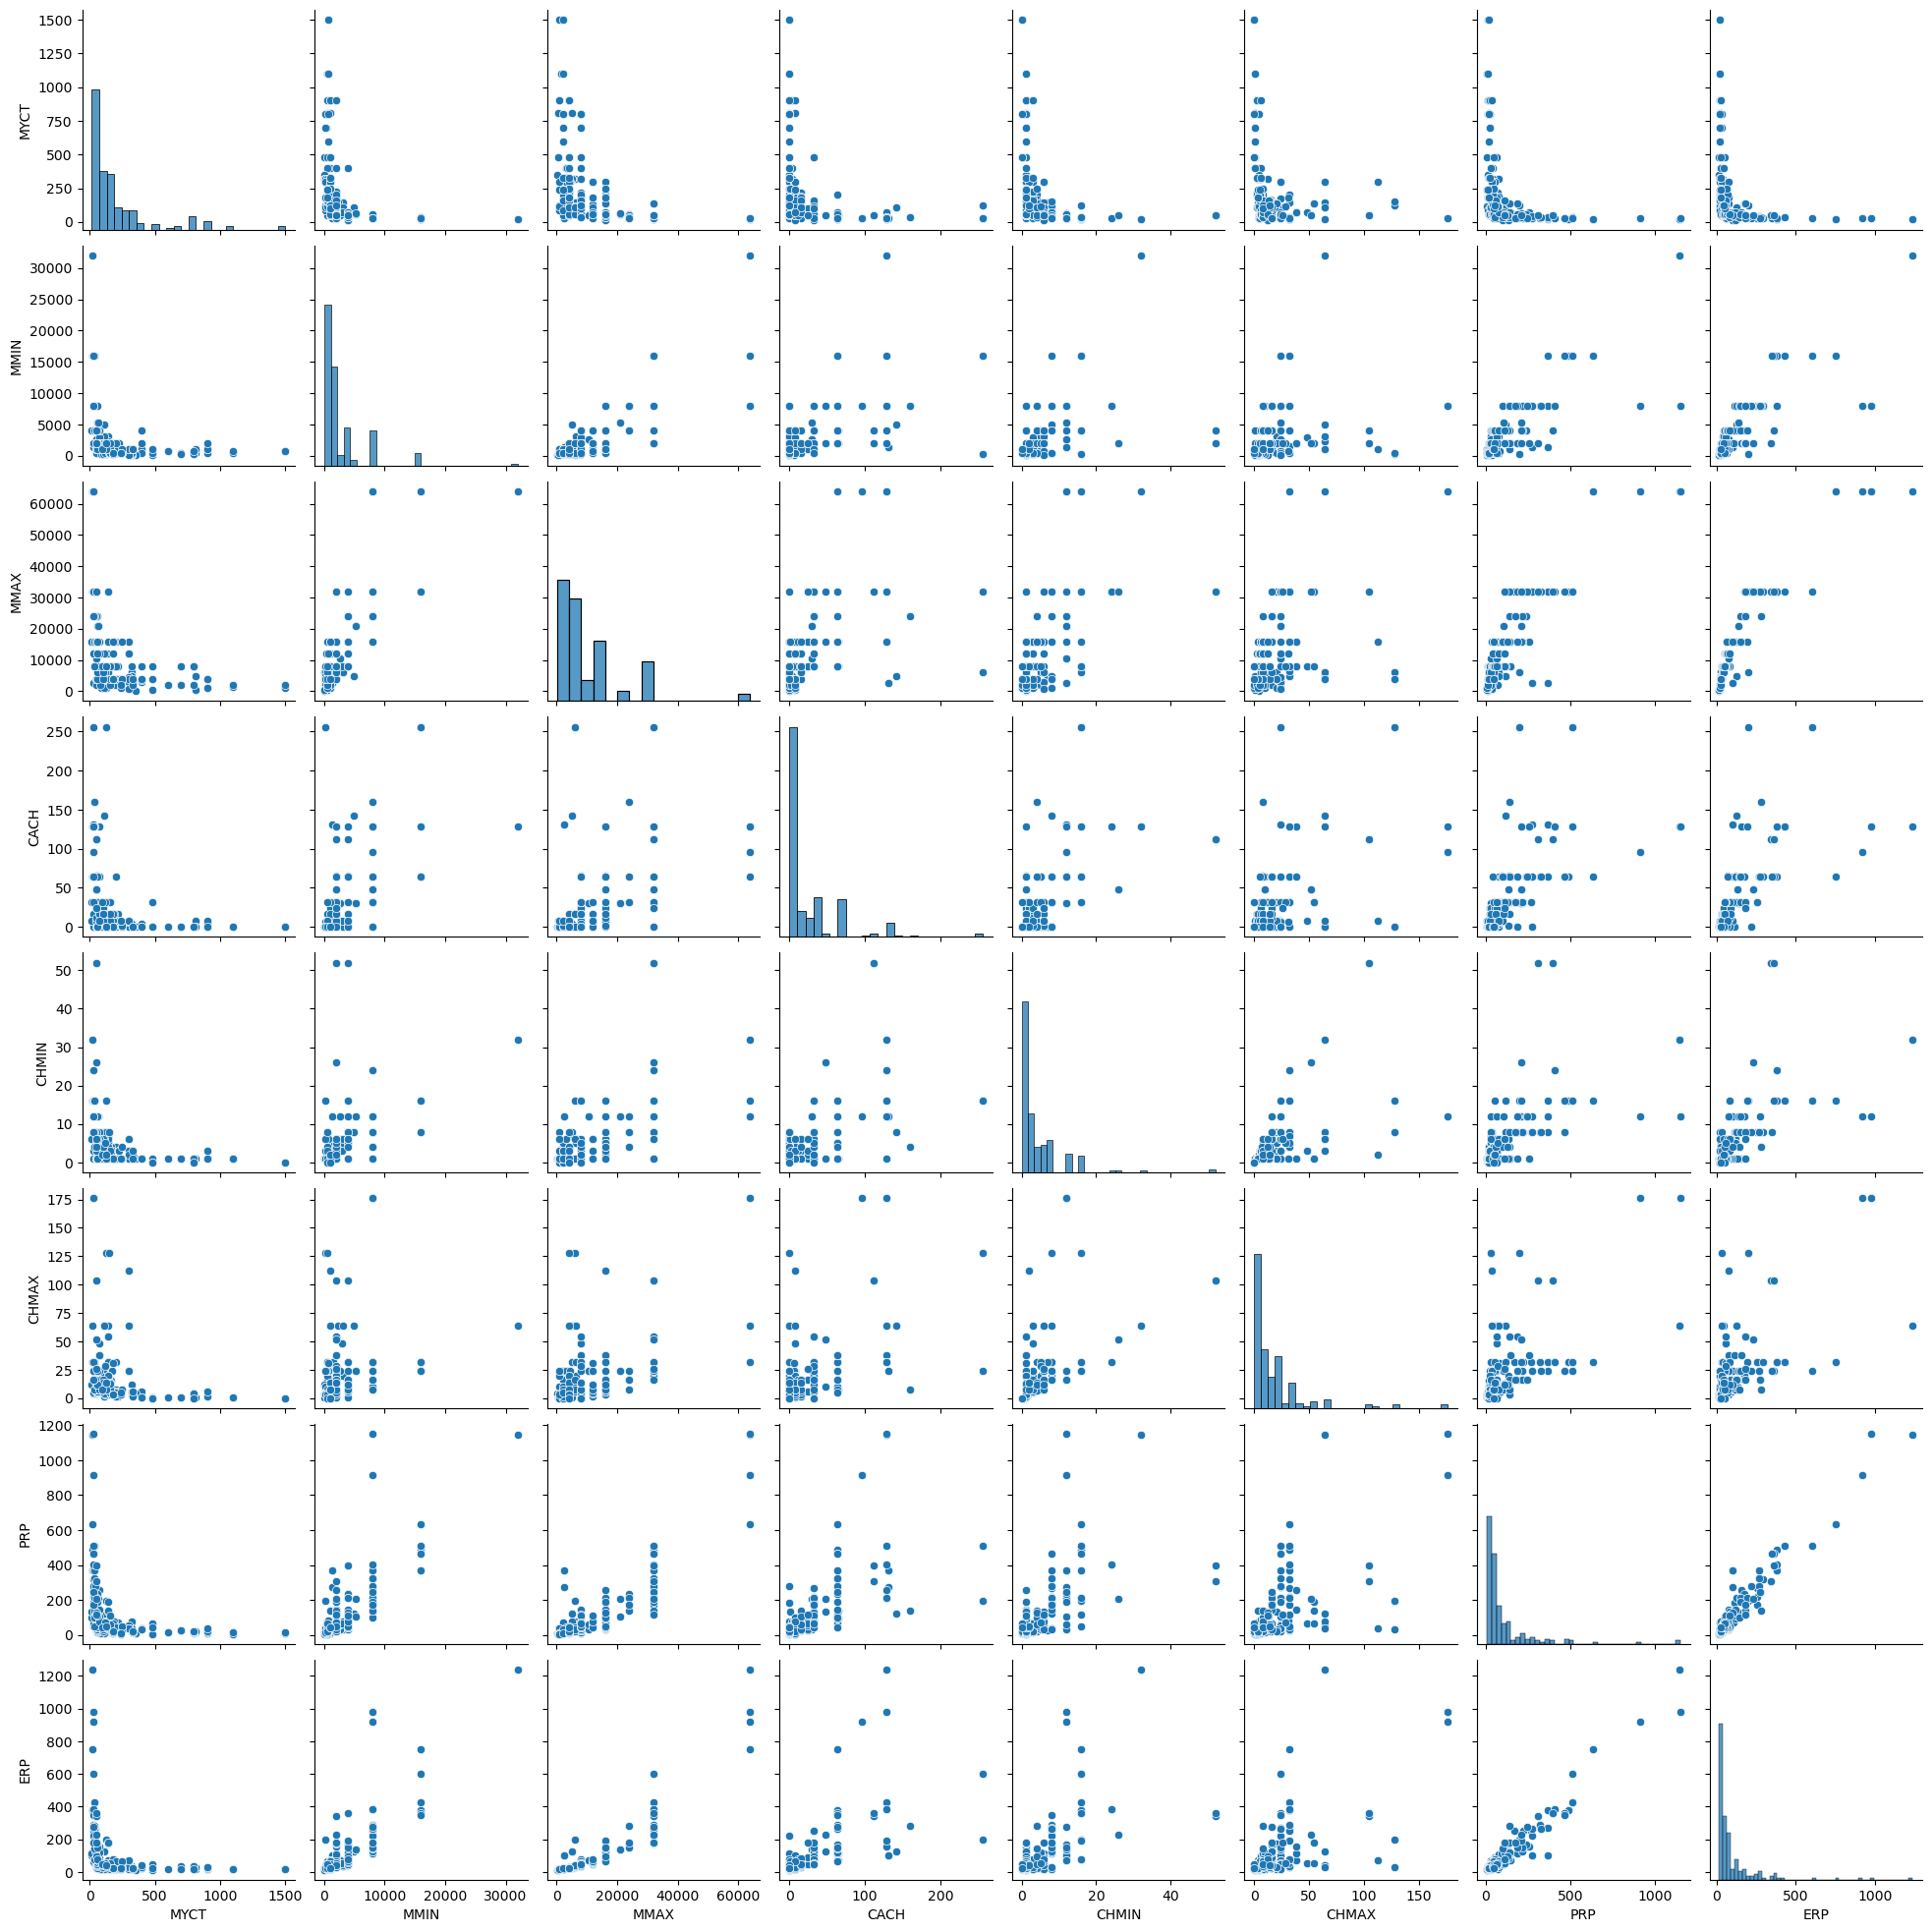

Linear_model-> Training MSE: 1529.020470551296, MAE: 23.232255784639346, R2: 0.9204648044109383
Linear_model-> Test MSE: 2370.0963747758224, MAE: 31.406218675535484, R2: 0.9534424890368546
Cross-Validation MSE: 3377.7668532915923, MAE: 30.17009429830956, R2 : 0.8333737813606049


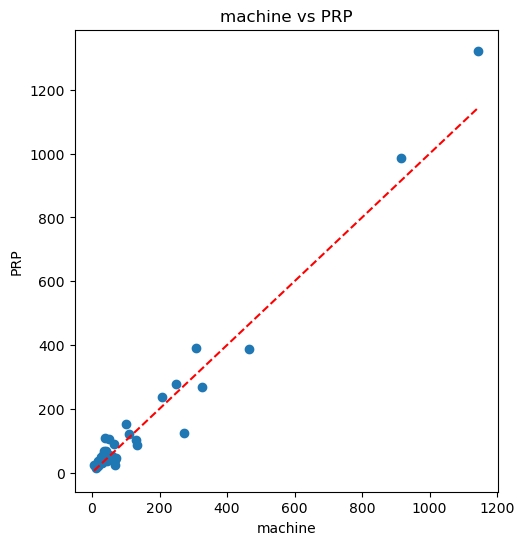

In [2]:
# 깃허브 : https://github.com/Jangkwangik/python_basic
# linear_cpu_data.ipynb

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor

# 데이터 로드
data = pd.read_csv('machine.data_update.csv')

# 데이터 탐색
# data.head()
# data.info()
# data.shape
# data.columns

# 불필요한 컬럼 제거
data = data.drop(columns=['VendorName', 'ModelName'])

# 데이터 분포 시각화
result = data.corr()['PRP']
result = np.abs(result).sort_values(ascending=False)
print(result)

num_features = data.columns
sns.pairplot(data[num_features])
plt.show()

num_features = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP']

# X 와 y 설정
X = data[num_features]
y = data['PRP']

# 훈련 데이터와 학습 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression 모델 생성
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# 성능 평가 - Linear Regression
linear_train_pred = linear_model.predict(X_train_scaled)
linear_test_pred = linear_model.predict(X_test_scaled)

linear_train_mse = mean_squared_error(y_train, linear_train_pred)
linear_test_mse = mean_squared_error(y_test, linear_test_pred)

linear_train_r2 = r2_score(y_train, linear_train_pred)
linear_test_r2 = r2_score(y_test, linear_test_pred)

linear_train_mae = mean_absolute_error(y_train, linear_train_pred)
linear_test_mae = mean_absolute_error(y_test, linear_test_pred)

print(f'Linear_model-> Training MSE: {linear_train_mse}, MAE: {linear_train_mae}, R2: {linear_train_r2}')
print(f'Linear_model-> Test MSE: {linear_test_mse}, MAE: {linear_test_mae}, R2: {linear_test_r2}')

# 교차 검증
cv_scores_mse = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores_mse.mean()

cv_scores_r2 = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
cv_r2 = cv_scores_r2.mean()

cv_scores_mae = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores_mae.mean()

print(f'Cross-Validation MSE: {cv_mse}, MAE: {cv_mae}, R2 : {cv_r2}')

# 실제 값과 예측 값 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(y_test, linear_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('machine')
plt.ylabel('PRP')
plt.title('machine vs PRP')

plt.show()